/scratch/fb590/code/gcmc-dev/src/external_potentials.py:271: RuntimeWarning: invalid value encountered in divide
  Vlin = Va + (Vb - Va) * (position[0] - xa) / (xb - xa)
/scratch/fb590/code/gcmc-dev/src/external_potentials.py:277: RuntimeWarning: invalid value encountered in divide
  Vlin_q = qVa + (qVb - qVa) * (position[0] - qxa) / (qxb - qxa)


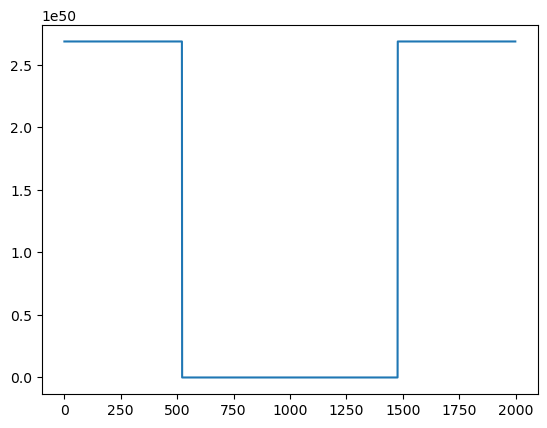

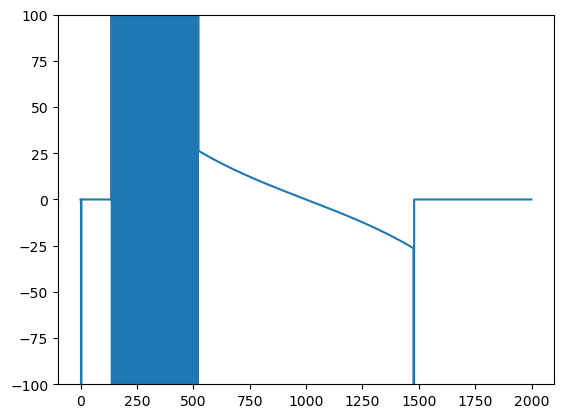

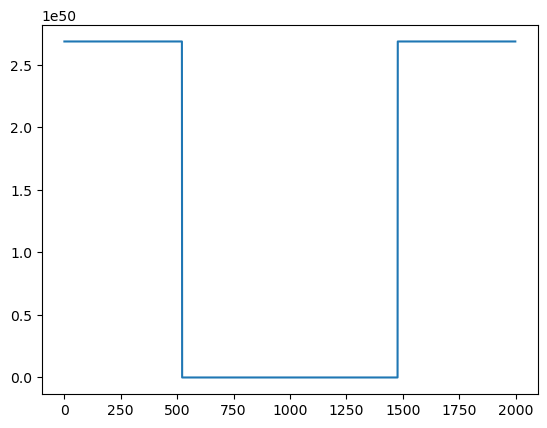

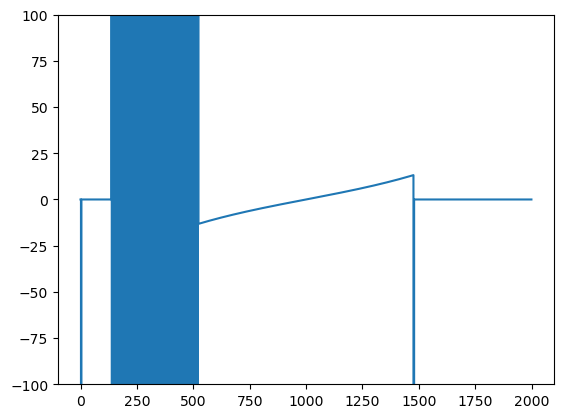

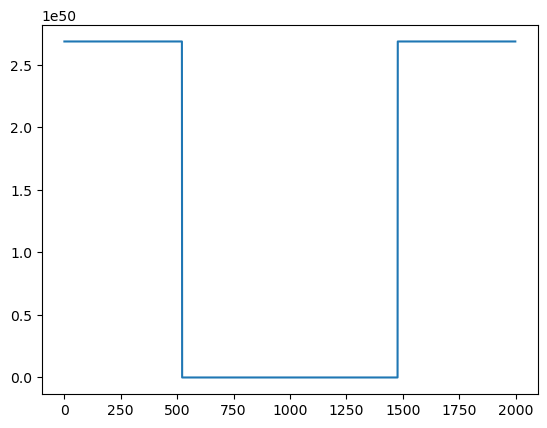

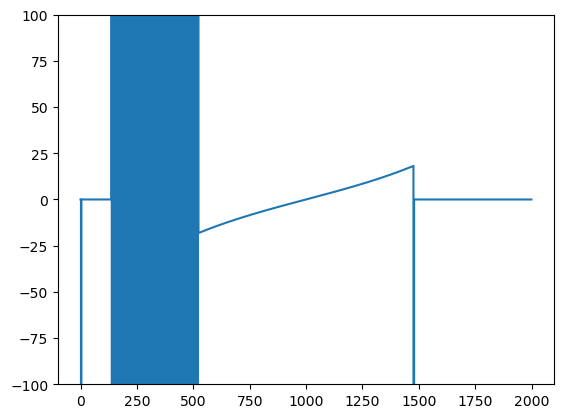

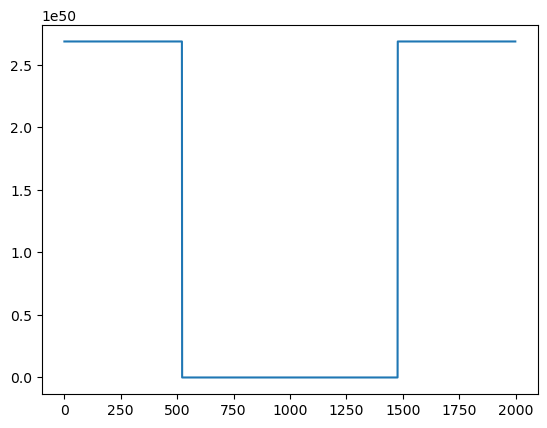

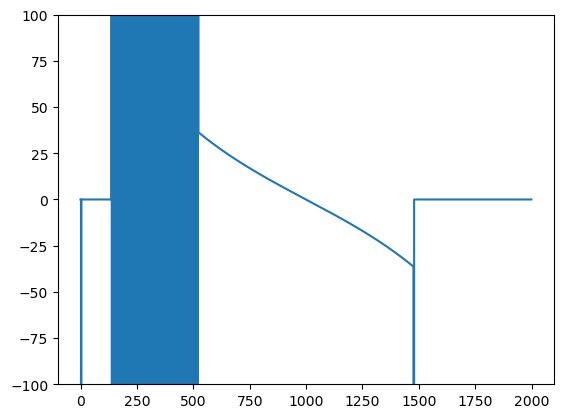

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import sys
import yaml
import scipy.constants as const

sys.path.insert(0, '/scratch/fb590/code/gcmc-dev/src')
from external_potentials import initialize_external_potentials

def initialize_potentials(config, particle_type):
    """
    Function to initialize the external potentials based on the configuration.
    
    Parameters:
    - config (dict): Configuration dictionary.
    
    Returns:
    - beta (float): Inverse temperature (1/kB*T).
    - Vext (function): External potential function for the given particle type.
    - mu (float): Chemical potential for the given particle type.
    """
    external_potentials = initialize_external_potentials(config)
    beta = 1 / (config['kB'] * config['T'])

    Vext = external_potentials[particle_type]
    mu = config['particle_types'][particle_type]['mu'] * config['kB'] * config['T']

    return beta, Vext, mu, config['T']


yamlfile = "input_nowalls.yaml"

with open(yamlfile, 'r') as file:
    config = yaml.safe_load(file)

bin_edges = x_positions = np.linspace(0, config['box_length_x'], 2001)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

species_list = ["C", "O", "N", "X"]

for species in species_list:
    beta, Vext, mu, T = initialize_potentials(config, species)
    xbins = np.array([bin_centers])
    Vext_values = Vext(xbins) # Vext is a function
    muloc_profile = (Vext_values - mu) * beta
    muloc_profile_in_kcal_per_mol = muloc_profile * const.Boltzmann * T * const.Avogadro / 4184 # keeping all the beta stuff here beause it helps me visualise conversions
    plt.plot(muloc_profile)
    plt.show()
    a = np.append(bin_centers[::]-bin_centers[::][0], bin_centers[::][-1]-bin_centers[::][0]+bin_centers[::][0])
    force_profile = np.gradient(-muloc_profile_in_kcal_per_mol, bin_centers) # computes d/dx (-u(x)) for each bin
    plt.plot(force_profile)
    plt.ylim(-100,100)
    plt.show()

